<a href="https://colab.research.google.com/github/sayanarajasekhar/PyTorch/blob/main/01_pytorch_workflow_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> Note: For all exercises, code should be device agnostic (meaning it could run on CPU or GPU if it's available).

In [95]:
# Import torch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.8.0+cu126'

### Setting up device agnostic code

In [96]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### 1. Create a straight line dataset using the linear regression formula `(weight * X + bias)`.

* Set `weight=0.3` and `bias=0.9` there should be at least `100` datapoints total.
* Split the data into `80%` training, `20%` testing.
* Plot the training and testing data so it becomes visual.

In [97]:
# Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.
weight = 0.3
bias = 0.9
start, end, step = 0, 1, 0.01

X = torch.arange(start, end, step)
y = weight * X + bias

# Split the data into 80% training, 20% testing.
split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

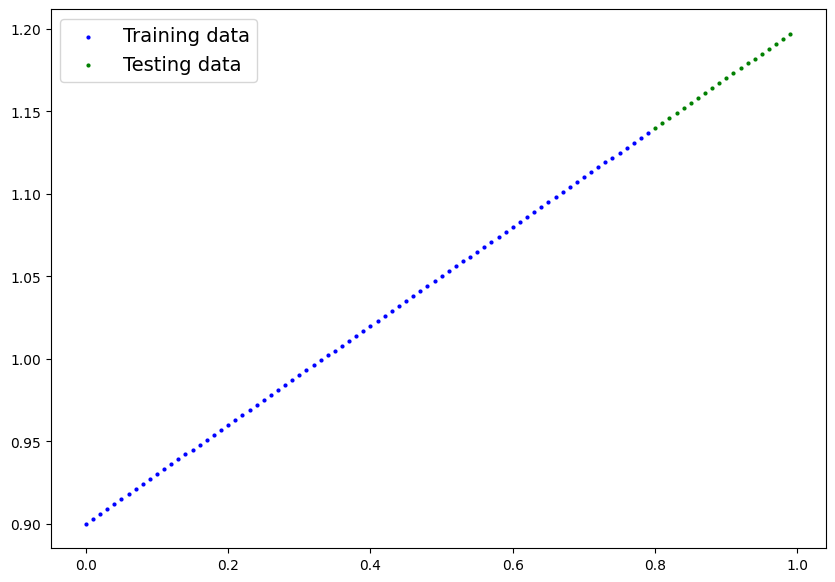

In [98]:
# Plot the training and testing data so it becomes visual.
def plot_predictions(x_train = X_train,
                     y_train = y_train,
                     x_test = X_test,
                     y_test = y_test,
                     predictions = None):
  plt.figure(figsize=(10, 7))
  plt.scatter(x_train.numpy(), y_train, c = 'b', s = 4, label = 'Training data')
  plt.scatter(x_test, y_test, c = 'g', s = 4, label = 'Testing data')

  if predictions is not None:
    plt.scatter(x_test, predictions, c = 'r', s = 4, label = 'Predictions')

  plt.legend(prop = {'size': 14})
  plt.show()

plot_predictions()

### 2. Build a PyTorch model by subclassing `nn.Module`.

* Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`.
* Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1.
* Constructed the model, make an instance of it and check its `state_dict()`.

> Note: If you'd like to use nn.Linear() instead of nn.Parameter() you can.

In [99]:
# Create PyTorch Linear regression model
class LinearRegressionModel_e0(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1,
                                           requires_grad = True,
                                           dtype = torch.float))
    self.bias = nn.Parameter(torch.rand(1,
                                        requires_grad = True,
                                        dtype = torch.float))
  # Implement the forward() method to compute the linear regression function
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weight * x + self.bias

# Constructed the model, make an instance of it and check its state_dict()
torch.manual_seed(42)
model_e0 = LinearRegressionModel_e0()
model_e0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.3904]))])

tensor([1.1400, 1.1430, 1.1460, 1.1490, 1.1520, 1.1550, 1.1580, 1.1610, 1.1640,
        1.1670, 1.1700, 1.1730, 1.1760, 1.1790, 1.1820, 1.1850, 1.1880, 1.1910,
        1.1940, 1.1970])
tensor([0.6598, 0.6632, 0.6665, 0.6699, 0.6733, 0.6766, 0.6800, 0.6834, 0.6867,
        0.6901, 0.6935, 0.6968, 0.7002, 0.7036, 0.7069, 0.7103, 0.7137, 0.7170,
        0.7204, 0.7238])


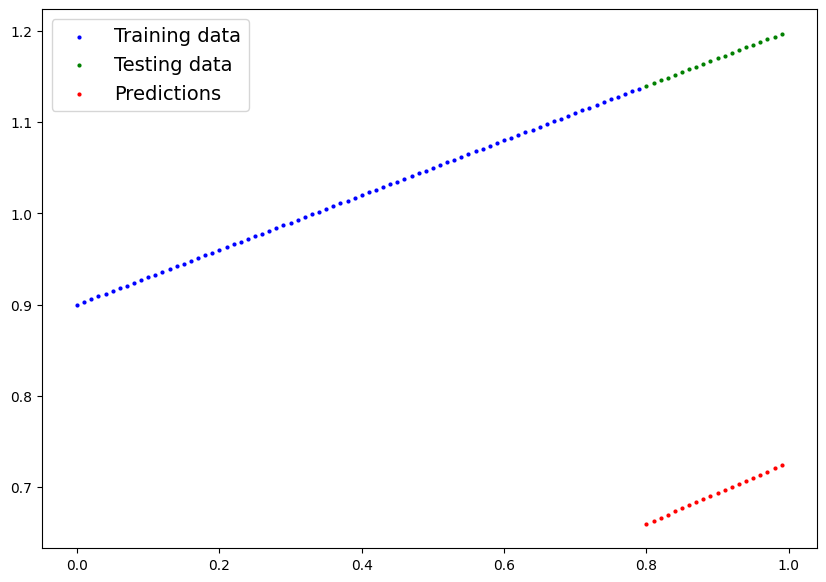

In [100]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_e0(X_test)

# You can also do something similar with torch.no_grad, but torch.inference_mode is prefered

print(y_test, y_preds, sep='\n')
plot_predictions(predictions=y_preds)

### 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively.

* Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
* Write a training loop to perform the appropriate training steps for 300 epochs.
* The training loop should test the model on the test dataset every 20 epochs.

In [101]:
# Create a loss function
loss_fn = nn.L1Loss()

# Create Optimizer
optimizer = torch.optim.SGD(params = model_e0.parameters(),
                            lr = 0.01)

In [102]:
# Write a training loop to perform the appropriate training steps for 300 epochs.
torch.manual_seed(42)
epochs = 300

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)
model_e0.to(device)

for epoch in range(epochs):

  # Training model
  model_e0.train()

  # Forward pass
  y_pred = model_e0(X_train)

  # Calculate loss
  train_loss = loss_fn(y_pred, y_train)

  # Optimizer zero grad
  optimizer.zero_grad()

  # Loss backward
  train_loss.backward()

  # Optimizer step
  optimizer.step()

  # Testing model on 20th epochs
  if epoch % 20 == 0:
    model_e0.eval()

    with torch.inference_mode():
      test_pred = model_e0(X_test)

      test_loss = loss_fn(test_pred, y_test)

    # Print out loss
    print(f"Epoch: {epoch} | Train Loss: {train_loss} | Test Loss: {test_loss}")



Epoch: 0 | Train Loss: 0.4950591027736664 | Test Loss: 0.4631786346435547
Epoch: 20 | Train Loss: 0.2638542652130127 | Test Loss: 0.19247382879257202
Epoch: 40 | Train Loss: 0.049216583371162415 | Test Loss: 0.05968007445335388
Epoch: 60 | Train Loss: 0.03414512798190117 | Test Loss: 0.07812028378248215
Epoch: 80 | Train Loss: 0.02729099802672863 | Test Loss: 0.06282456964254379
Epoch: 100 | Train Loss: 0.020436866208910942 | Test Loss: 0.04752882197499275
Epoch: 120 | Train Loss: 0.013585656881332397 | Test Loss: 0.031201321631669998
Epoch: 140 | Train Loss: 0.006734463851898909 | Test Loss: 0.014873749576508999
Epoch: 160 | Train Loss: 0.009003933519124985 | Test Loss: 0.000663799059111625
Epoch: 180 | Train Loss: 0.009003933519124985 | Test Loss: 0.000663799059111625
Epoch: 200 | Train Loss: 0.009003933519124985 | Test Loss: 0.000663799059111625
Epoch: 220 | Train Loss: 0.009003933519124985 | Test Loss: 0.000663799059111625
Epoch: 240 | Train Loss: 0.009003933519124985 | Test Loss: 

In [103]:
model_e0.state_dict()

OrderedDict([('weight', tensor([0.3077], device='cuda:0')),
             ('bias', tensor([0.9059], device='cuda:0'))])

### 4. Make predictions with the trained model on the test data.

* Visualize these predictions against the original training and testing data (**note**: make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

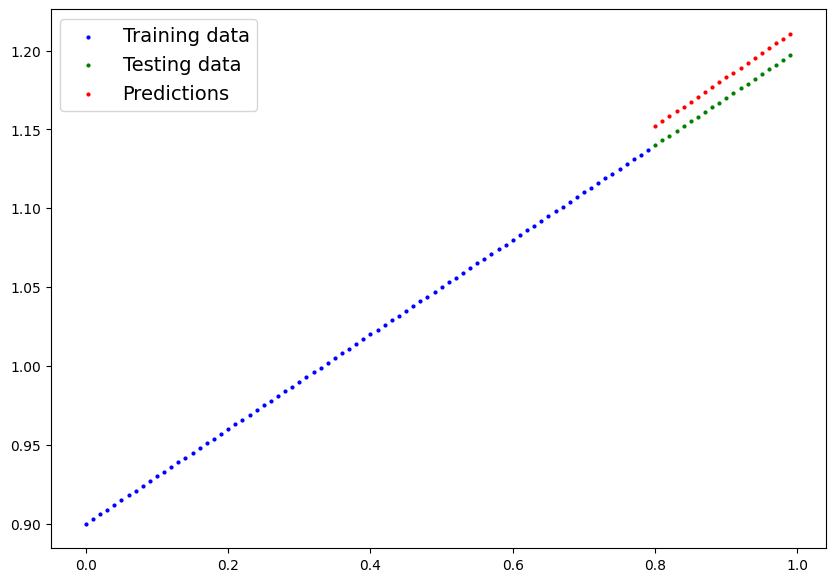

In [104]:
# 1. Set the model in evaluation mode
model_e0.eval()

with torch.inference_mode():
  preds = model_e0(X_test)

X_test.device, preds.device
plot_predictions(predictions=preds.cpu().numpy())

### 5. Save your trained model's state_dict() to file.

* Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
* Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.